### The objective of this project is to display correlations of the movies dataset

In [1]:
#Importing libraries 

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (10,10)

#Loading data

df = pd.read_csv('movies.csv')

In [2]:
#Looking into data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
#Dataframe structure overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [4]:
#Statistics of numeric columns
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [5]:
#Null rows count as percentages
np.round(df.isnull().sum() * 100 / len(df), 2)

name         0.00
rating       1.00
genre        0.00
year         0.00
released     0.03
score        0.04
votes        0.04
director     0.00
writer       0.04
star         0.01
country      0.04
budget      28.31
gross        2.46
company      0.22
runtime      0.05
dtype: float64

In [6]:
#Duplicate search
df.duplicated().sum()

0

In [7]:
df.sort_values('gross', ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


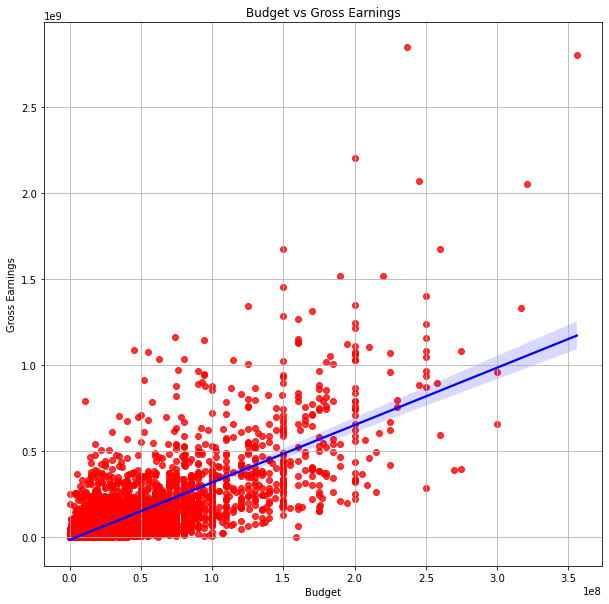

In [18]:
#Correlation between budget vs gross
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color' : 'red'}, line_kws={'color' : 'blue'})
plt.title("Budget vs Gross Earnings")
plt.xlabel("Budget")
plt.ylabel("Gross Earnings")
plt.grid()

In [28]:
#Creating correlation variable
corr = df.corr(method='pearson')
corr

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


<AxesSubplot:>

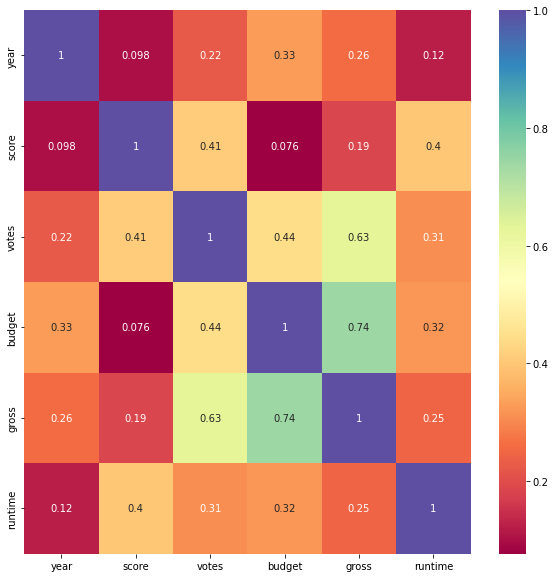

In [29]:
#Correlation matrix
sns.heatmap(corr, cmap='Spectral', annot=True)
plt.show()

In [8]:
#Selecting only three columns, rating, genre and score
df_heatmap_score = df.drop(df.columns.difference(['rating', 'genre', 'score']), 1)
df_heatmap_score.head()

C:\Users\T-GAMER\AppData\Local\Temp\ipykernel_10744\2493636881.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_heatmap = df.drop(df.columns.difference(['rating', 'genre', 'score']), 1)


,rating,genre,score
0,R,Drama,8.4
1,R,Adventure,5.8
2,PG,Action,8.7
3,PG,Comedy,7.7
4,R,Comedy,7.3


In [9]:
df_heatmap_score = df_heatmap_score.pivot_table(values='score', index='rating', columns='genre', aggfunc=np.mean)

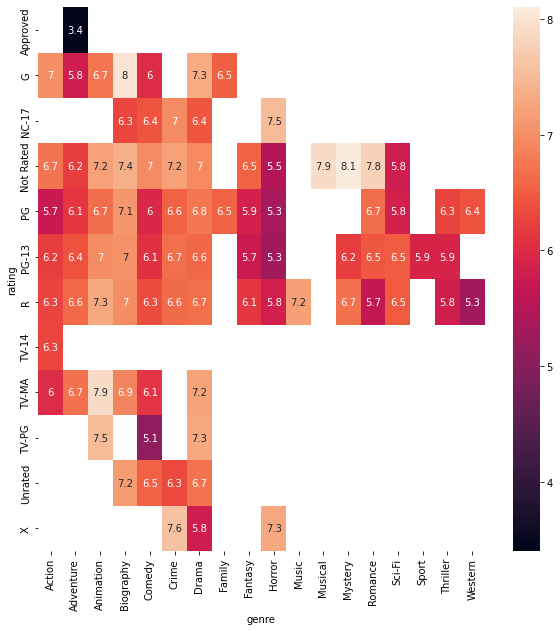

In [10]:
#Heatmap - Scores vs Rating vs Genre
sns.heatmap(df_heatmap, annot=True)
plt.show()

In [30]:
#Numerizing dataframe - It transforms categorical variables into numerical
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000.0,NaN,-1,90.0
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,NaN,NaN,539,90.0
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750.0,NaN,941,NaN
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000.0,NaN,-1,120.0


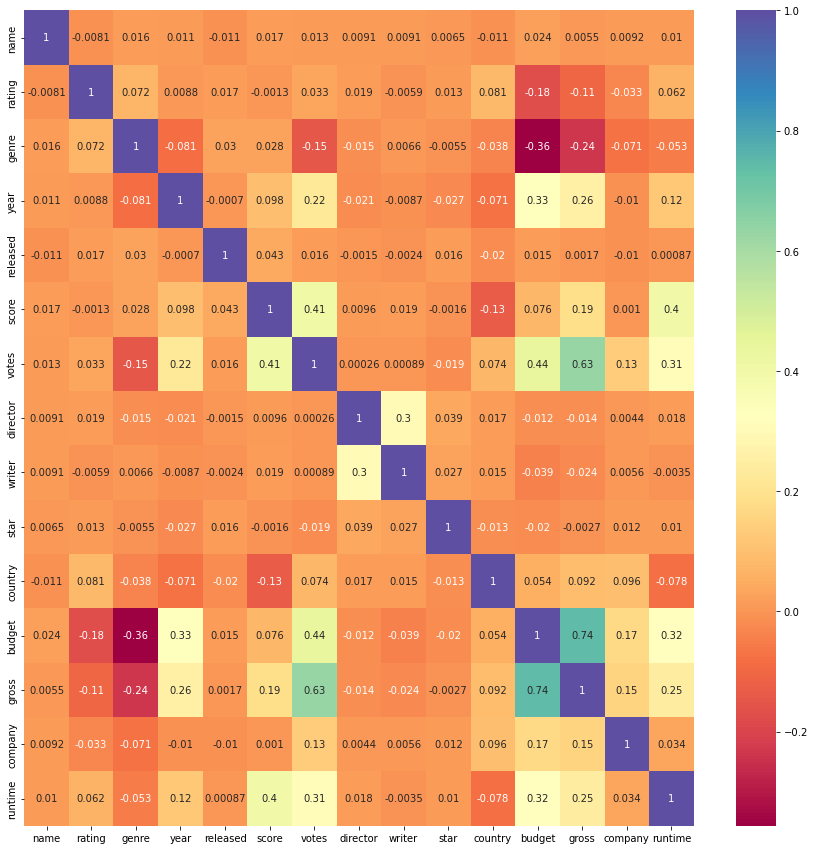

In [33]:
#Correlation Matrix of transformed data
plt.figure(figsize=(15,15))
corr = df_numerized.corr()
sns.heatmap(corr, cmap='Spectral', annot=True)
plt.show()

In [40]:
#Correlation pairings
pd.set_option('display.max_rows', None)
corr_pairs = corr.unstack()
corr_pairs.sort_values(ascending=False)

name      name        1.000000
rating    rating      1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
director  director    1.000000
runtime   runtime     1.000000
gross     budget      0.740395
budget    gross       0.740395
votes     gross       0.630757
gross     votes       0.630757
votes     budget      0.442429
budget    votes       0.442429
score     votes       0.409182
votes     score       0.409182
score     runtime     0.399451
runtime   score       0.399451
year      budget      0.329321
budget    year        0.329321
          runtime     0.320447
runtime   budget      0.320447
          votes       0.309212
votes     runtime     0.309212
director  writer      0.299067
writer  

In [42]:
#Showing only high correlations 0.5+
high_corr = corr_pairs[(corr_pairs) > 0.5]
high_corr.sort_values()

gross     votes       0.630757
votes     gross       0.630757
gross     budget      0.740395
budget    gross       0.740395
name      name        1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [44]:
#Showing negative correlations

negative_corr = corr_pairs[(corr_pairs) < 0]
negative_corr.sort_values()

budget    genre      -0.356564
genre     budget     -0.356564
gross     genre      -0.235650
genre     gross      -0.235650
budget    rating     -0.176002
rating    budget     -0.176002
votes     genre      -0.145307
genre     votes      -0.145307
country   score      -0.133348
score     country    -0.133348
rating    gross      -0.107339
gross     rating     -0.107339
genre     year       -0.081261
year      genre      -0.081261
country   runtime    -0.078412
runtime   country    -0.078412
genre     company    -0.071067
company   genre      -0.071067
country   year       -0.070938
year      country    -0.070938
genre     runtime    -0.052711
runtime   genre      -0.052711
budget    writer     -0.039451
writer    budget     -0.039451
country   genre      -0.037615
genre     country    -0.037615
rating    company    -0.032943
company   rating     -0.032943
year      star       -0.027242
star      year       -0.027242
writer    gross      -0.023519
gross     writer     -0.023519
year    

In [45]:
#The highest correlations are Gross vs Votes and Gross vs Budget
#The lowest are Budget vs Genre and Gross vs Genre